In [1]:
import os
import time
import copy
from tqdm import tqdm_notebook as tqdm
#Braeburn 0
#Crimson 1
#Red Delicious 2
files = os.listdir('Apple TrainDataset')  #Put this PY file in same folder with this
print(len(files))
files[0:10]

3


['0', '1', '2']

In [2]:
base_path = 'Apple TrainDataset'
folder = os.listdir(base_path)
len(folder)

3

In [3]:
total_images = 0
for n in range(1):
    for c in [0, 1, 2]:
        class_path = base_path + "/" + str(c) + "/"
        print(class_path)
        subfiles = os.listdir(class_path)
        total_images += len(subfiles)
print(total_images)

Apple TrainDataset/0/
Apple TrainDataset/1/
Apple TrainDataset/2/
1426


In [4]:
import pandas as pd
import numpy as np
from os import listdir
k=0
data = pd.DataFrame(index=np.arange(0, total_images), columns=["path", "target"])
for c in [0,1,2]:
    class_path = base_path + "/" + str(c) + "/"
    subfiles = listdir(class_path)
    for m in range(len(subfiles)):
        image_path = subfiles[m]
        data.iloc[k]["path"] = class_path + image_path
        data.iloc[k]["target"] = c
        k += 1
data

,path,target
0,Apple TrainDataset/0/0_100.jpg,0
1,Apple TrainDataset/0/100_100.jpg,0
2,Apple TrainDataset/0/101_100.jpg,0
3,Apple TrainDataset/0/102_100.jpg,0
4,Apple TrainDataset/0/103_100.jpg,0
...,...,...
1421,Apple TrainDataset/2/r_95_100.jpg,2
1422,Apple TrainDataset/2/r_96_100.jpg,2
1423,Apple TrainDataset/2/r_97_100.jpg,2
1424,Apple TrainDataset/2/r_98_100.jpg,2


In [5]:
brae = np.random.choice(data[data.target==0].index.values, size=50, replace=False)
crim = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
red = np.random.choice(data[data.target==2].index.values, size=50, replace=False)

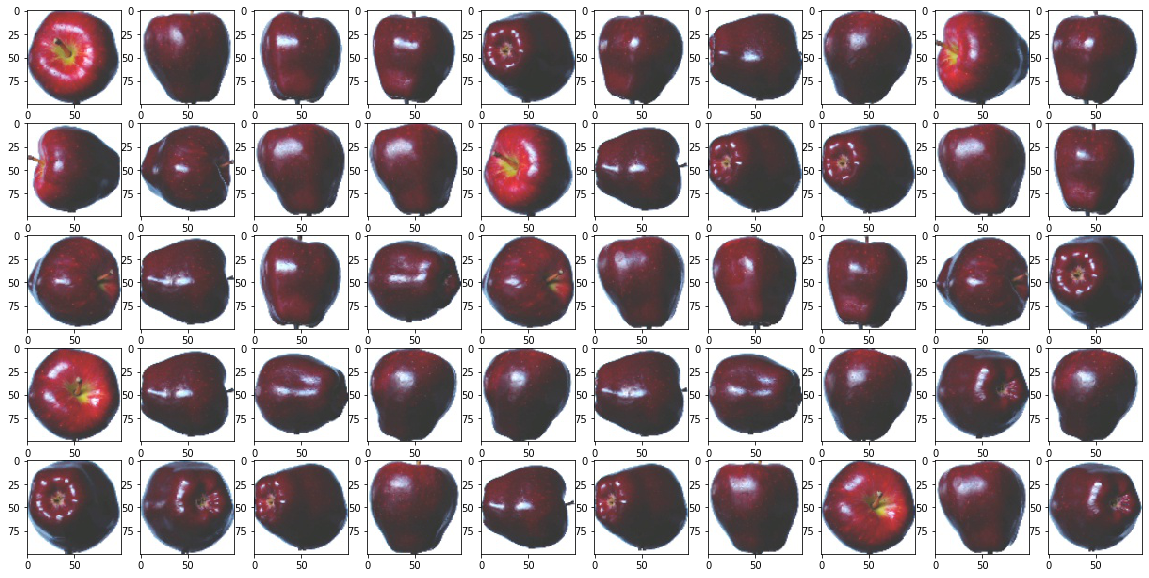

In [6]:
from skimage.io import imread
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = red[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
def class_count(input):
    grp = input.groupby(['target'])['path'].nunique()
    return {key: grp[key] for key in list(grp.keys())}

def class_prop(input):
    cc = class_count(input)
    return{val[0]: (round(val[1]/input.shape[0],4)*100) for val in cc.items()}

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

x_train_path,x_test_path = train_test_split(data,test_size=0.2,stratify=data['target'],random_state=42)
tt = [x_train_path,x_test_path]
for i in range(len(tt)):
    print(namestr(tt[i], globals()),'image count:',class_count(tt[i]),class_prop(tt[i]))

['x_train_path'] image count: {0: 393, 1: 355, 2: 392} {0: 34.47, 1: 31.14, 2: 34.39}
['x_test_path'] image count: {0: 99, 1: 89, 2: 98} {0: 34.62, 1: 31.119999999999997, 2: 34.27}


In [8]:
print(x_train_path)

                                    path target
1295  Apple TrainDataset/2/r_241_100.jpg      2
238     Apple TrainDataset/0/314_100.jpg      0
1088    Apple TrainDataset/2/282_100.jpg      2
751   Apple TrainDataset/1/r_148_100.jpg      1
620     Apple TrainDataset/1/265_100.jpg      1
...                                  ...    ...
498      Apple TrainDataset/1/14_100.jpg      1
1177     Apple TrainDataset/2/97_100.jpg      2
135     Apple TrainDataset/0/221_100.jpg      0
1316  Apple TrainDataset/2/r_260_100.jpg      2
720   Apple TrainDataset/1/r_107_100.jpg      1

[1140 rows x 2 columns]


In [9]:
import cv2
def importimg(df):
    IMG_SIZE = 64
    all_images = []
    label = []
    for i in range(len(df)):
        image_path = df.path.values[i]
        labels = df.target.values[i]
        img = cv2.imread(image_path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        all_images.append(img)
        label.append(labels)
    train = np.array(all_images)
    tlabel = np.array(label)
    return train,tlabel
x_train,y_train = importimg(x_train_path)
x_test,y_test = importimg(x_test_path)
print(x_train.shape,x_train.shape)

(1140, 64, 64, 3) (1140, 64, 64, 3)


In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape,y_test.shape)

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

(1140, 3) (286, 3)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
N = 5
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=N)

Train on 1140 samples, validate on 286 samples
Epoch 1/5
1140/1140 [==============================] - 1s 896us/step - loss: 2.0863e-04 - accuracy: 1.0000 - val_loss: 2.1449e-04 - val_accuracy: 1.0000
Epoch 2/5
1140/1140 [==============================] - 1s 622us/step - loss: 1.5326e-04 - accuracy: 1.0000 - val_loss: 1.7332e-04 - val_accuracy: 1.0000
Epoch 3/5
1140/1140 [==============================] - 1s 728us/step - loss: 1.3897e-04 - accuracy: 1.0000 - val_loss: 1.4898e-04 - val_accuracy: 1.0000
Epoch 4/5
1140/1140 [==============================] - 1s 975us/step - loss: 1.0180e-04 - accuracy: 1.0000 - val_loss: 1.0707e-04 - val_accuracy: 1.0000
Epoch 5/5
1140/1140 [==============================] - 1s 870us/step - loss: 8.1701e-05 - accuracy: 1.0000 - val_loss: 1.5499e-04 - val_accuracy: 1.0000


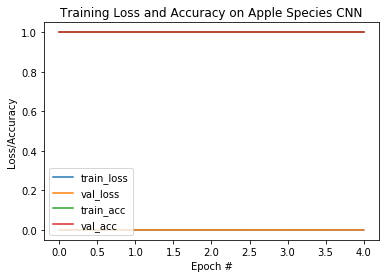

In [28]:
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Apple Species CNN")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [29]:
a = model.predict(x_test[:])
print(a.shape)
print(y_test.shape)
print(a[:5])
print(y_test[:5])

(286, 3)
(286, 3)
[[1.0000000e+00 2.1062244e-13 1.7626466e-11]
 [6.6919603e-20 4.4424000e-13 1.0000000e+00]
 [1.0000000e+00 2.6180932e-11 1.1604009e-15]
 [3.1796187e-06 9.9975723e-01 2.3954261e-04]
 [1.0000000e+00 1.1554228e-15 5.7195949e-12]]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [30]:
def test1D(df):
    pred = []
    for i in range(len(df)):
        if df[i][0] == 1:
            prediction = 'Braeburn'
        elif df[i][1] == 1:
            prediction = 'Crimson Snow'
        elif df[i][2] == 1:
            prediction = 'Red Delicious'
        pred.append(prediction)
    oned = np.array(pred)
    return oned

In [31]:
mat_pre = test1D(a)
mat_test = test1D(y_test)
print(mat_pre[:10])
print(mat_test[:10])

['Braeburn' 'Red Delicious' 'Braeburn' 'Braeburn' 'Braeburn' 'Braeburn'
 'Red Delicious' 'Red Delicious' 'Braeburn' 'Braeburn']
['Braeburn' 'Red Delicious' 'Braeburn' 'Crimson Snow' 'Braeburn'
 'Crimson Snow' 'Red Delicious' 'Red Delicious' 'Braeburn' 'Braeburn']


In [32]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(mat_pre,mat_test)
print(cnf_matrix)

[[83 18 14]
 [ 6 53  6]
 [10 18 78]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(mat_pre, mat_test,target_names=['Braeburn', 'Crimsom Snow', 'Red Delicious']))

               precision    recall  f1-score   support

     Braeburn       0.84      0.72      0.78       115
 Crimsom Snow       0.60      0.82      0.69        65
Red Delicious       0.80      0.74      0.76       106

     accuracy                           0.75       286
    macro avg       0.74      0.76      0.74       286
 weighted avg       0.77      0.75      0.75       286



In [19]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

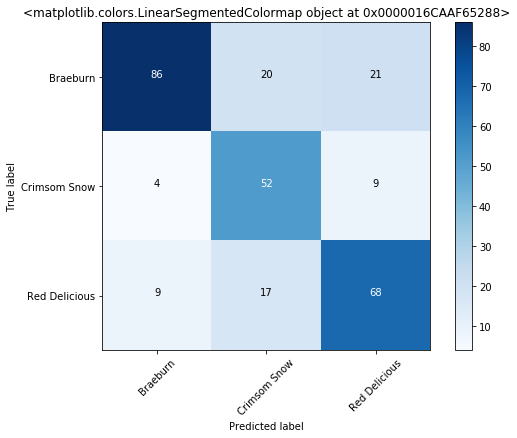

In [20]:
plot_confusion_matrix(cnf_matrix,['Braeburn', 'Crimsom Snow', 'Red Delicious'],plt.cm.Blues,normalize=False)

In [21]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

from keras import models
from keras import layers

vggmodel = models.Sequential()
vggmodel.add(conv_base)
vggmodel.add(layers.Flatten())
vggmodel.add(layers.Dense(256, activation='relu'))
vggmodel.add(layers.Dense(3, activation='softmax'))
vggmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
N = 6
I = vggmodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=N)

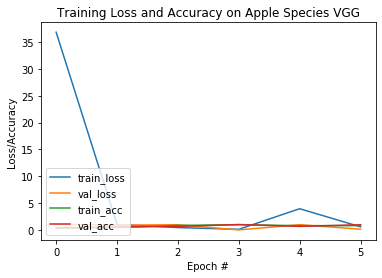

In [23]:
plt.figure()
plt.plot(np.arange(0, N), I.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), I.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), I.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), I.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Apple Species VGG")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [24]:
b = vggmodel.predict(x_test[:])
print(b.shape)
print(y_test.shape)
print(b[:5])
print(y_test[:5])

(286, 3)
(286, 3)
[[9.4596171e-01 2.4113799e-03 5.1626872e-02]
 [1.5962330e-01 2.1898844e-04 8.4015775e-01]
 [9.6496171e-01 2.8751933e-03 3.2163020e-02]
 [6.0309307e-04 9.8284239e-01 1.6554555e-02]
 [9.6101534e-01 1.4513015e-04 3.8839500e-02]]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [25]:
def test1D(df):
    pred = []
    for i in range(len(df)):
        if df[i][0] == 1:
            prediction = 'Braeburn'
        elif df[i][1] == 1:
            prediction = 'Crimson Snow'
        elif df[i][2] == 1:
            prediction = 'Red Delicious'
        pred.append(prediction)
    oned = np.array(pred)
    return oned

In [26]:
mat_preb = test1D(b)
mat_testb = test1D(y_test)
print(mat_preb[:10])
print(mat_testb[:10])

UnboundLocalError: local variable 'prediction' referenced before assignment

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrixb = confusion_matrix(mat_preb,mat_testb)
print(cnf_matrixb)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(mat_preb, mat_testb,target_names=['Braeburn', 'Crimsom Snow', 'Red Delicious']))

In [ ]:
plot_confusion_matrix(cnf_matrixb,['Braeburn', 'Crimsom Snow', 'Red Delicious'],plt.cm.Blues,normalize=False)